# Statistical Forecasting Approach – Basic Models

COURSE TITLE	:	Time Series Analysis and Stochastic Methods <br>
COURSE CODE	:	DS 412<br>


**Imports and Libraries**

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Moving Average Model (MA) 

In time series analysis, the moving-average model (MA model), also known as moving-average process, is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

Together with the autoregressive (AR) model, the moving-average model is a special case and key component of the more general ARMA and ARIMA models of time series, which have a more complicated stochastic structure.

Uses and characteristics:
- The MA model is used for forecasting time series data
- It uses the past forecast errors to predict the next point in time
- We refer to the moving average model as the MA(**q**) model where our q is the **order** 

Mathematically, the moving average model is represented by:

<img src='MA_model.png' width=500 length=500>

where $Z_t$ is some whitenoise and $\theta_t$ is some weight. <br><br>

A Moving Average Model of order 2 is represented as:

<img src='MA_model2.png' width=500 length=500>

Let us simulate the moving average model in code. 

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulation of a Moving Average Model - MA model of order 2  MA(2)

This is the equation that we will be simulating:

$ y_t = 0.9Z_{t-1} + 0.3Z_{t-2} $

This is a process of order 2. 

In [4]:
#Define ma2 array and ar2 array
#ma2 will contain coefficients of the lags of the MA2 process
#going to be a numpy array
#note that coefficient of lag 0 is always almost equal to 1

ma2 = np.array([1, 0.9, 0.3])

#for the purpose of simulation we shall also place the coefficients of the AR process
#to declare that there is no AR process, simply place 0 as coefficent for both time stamps t-1 and t-2
ar2 = np.array([1, 0, 0]) 

#print the arrays
print(ma2)
print(ar2)

[1.  0.9 0.3]
[1 0 0]


In [5]:
#create a MA2 process wiith 1000 samples
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

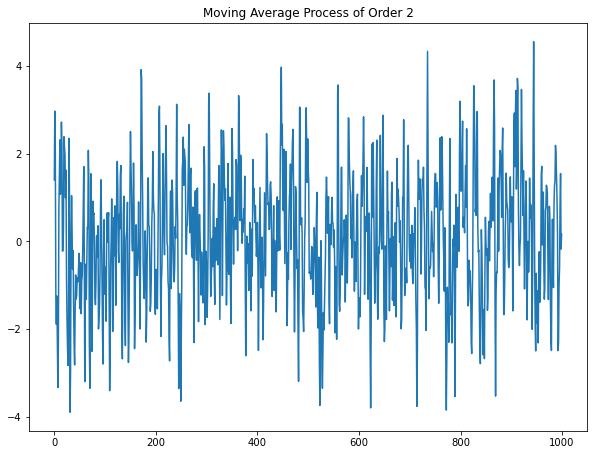

In [6]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

**Zoom in to the plot**

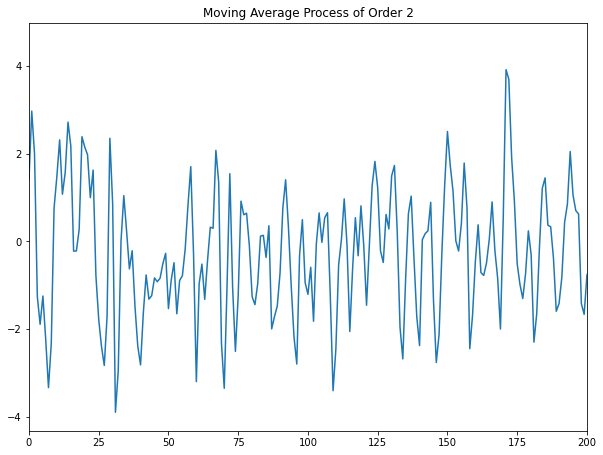

In [7]:
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.xlim(0, 200)
plt.show()

### Plot the ACF plot

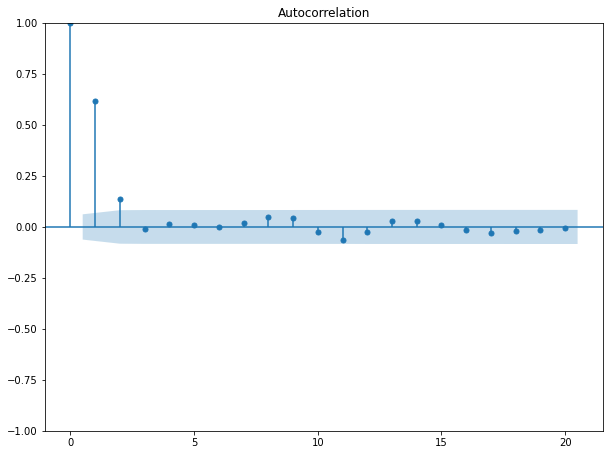

In [8]:
plot_acf(MA2_process, lags=20);

### Model Simulation to get back our coefficients

In [9]:
MA_model = ARIMA(MA2_process, order=(0,0,2), enforce_stationarity=False).fit()

#order parameter
#AR process
#order of differencing
#order of MA process
print(MA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1427.316
Date:                Fri, 28 Oct 2022   AIC                           2862.633
Time:                        12:41:52   BIC                           2882.252
Sample:                             0   HQIC                          2870.091
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0691      0.074      0.937      0.349      -0.075       0.214
ma.L1          0.9642      0.029     33.058      0.000       0.907       1.021
ma.L2          0.3326      0.031     10.902      0.0

### Make Predictions using MA model

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from random import random

# contrived dataset - (made up dataset)
data = [x + random() for x in range(1, 100)]

# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()

# make prediction ()
yhat = model_fit.predict(len(data),len(data))
print(yhat)

[72.56289669]


## Auto Regressive Model (AR) 

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model. The method is suitable for univariate time series without trend and seasonal components. Contrary to the moving-average (MA) model, the autoregressive model is not stationary hence it can only be applied to stationary time series. 

Uses and characteristics:
- The auto regressive model uses a **linear combination** of past values of the target to make a prediction 
- Autoregression means regression against the target itself
- We refer to the autoregressiive model as the AR(**p**) model where our p is the **order** 
- Autoregressive models are remarkably flexible at handling a wide range of different time series patterns. 

Mathematically, the autoregressive model is represented by:

<img src='AR_model.png' width=500 length=500>

where $p$ is the order, $c$ is the constant and $\epsilon$ is noise at time $t$

Let us see how this will be implemented in code.

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (10, 7.5)

### Simulation of a Auto Regressive Model - AR model of order 2  AR(2)

$ y_t = 0.33y_{t-1} + 0.5y_{t-2} $

In [13]:
#Define ma2 array and ar2 array
#ar2 will contain coefficients of the lags of the AR2 process
#going to be a numpy array
#note that coefficient of lag 0 is always almost equal to 1

ar2 = np.array([1, 0.33, 0.5])

#for the purpose of simulation we shall also place the coefficients of the MA process
#to declare that there is no MA process, simply place 0 as coefficent for both time stamps t-1 and t-2
ma2 = np.array([1, 0, 0]) 

#print the arrays
print(ar2)
print(ma2)

[1.   0.33 0.5 ]
[1 0 0]


In [14]:
#create a AR2 process wiith 1000 samples
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

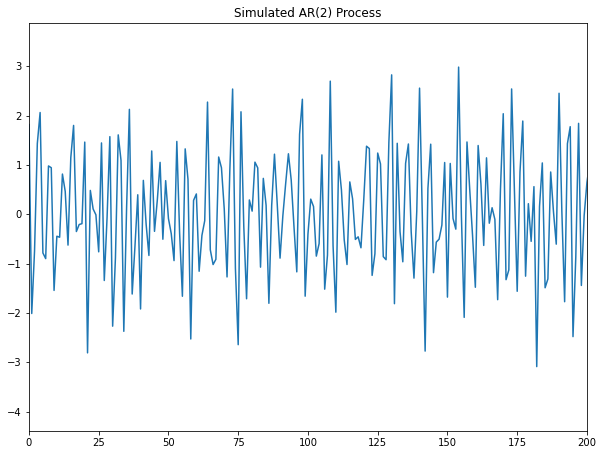

In [15]:
plt.plot(AR2_process)
plt.title('Simulated AR(2) Process')
plt.xlim(0, 200)
plt.show()

### Plot the AR ACF plot 

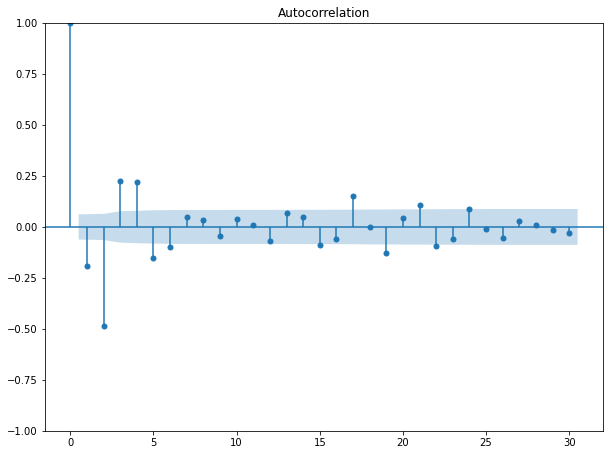

In [16]:
plot_acf(AR2_process);

What do you notice?

- oscillation 
- not constant increase/decrease  of cofficeint lags
- not helpful in estimating the order (no information that can be extracted) 
- Suggests that the we should be using PACF

### Plot the AR PACF plot 

PACF stands for **Partial autocorrelation function**. 


- Finds the correlation between present value and residuals of previous lag
- Finds a correlation not explained by the ACF

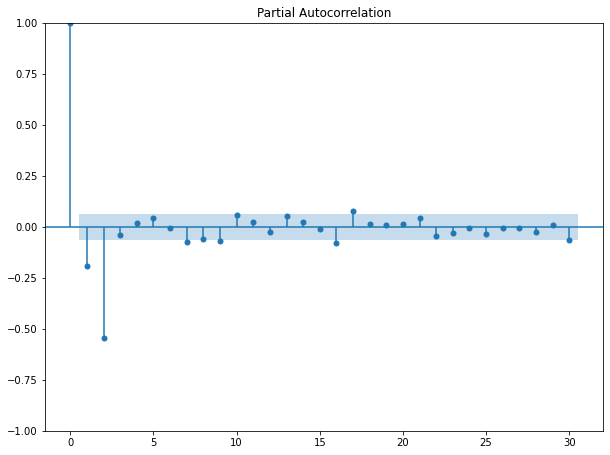

In [17]:
plot_pacf(AR2_process);

What do you notice?

- A significant peak is seen until lag 2 which gives an impression that the order of this process is indeed 2.  


### Model Simulation to get back our coefficients

**Yule Walker function** <br><br>

Yule Walker equations relate auto-regressive model parameters to auto-covariance of random process. It can be applied to find the AR(N) model parameters from a given time-series data that indeed can be assumed to be AR process (visually examining auto-correlation function (ACF) and partial auto-correlation function (PACF) may give clue on whether the data can be assumed as an AR or MA process with appropriate model order N.

In [18]:
#use yule_walker function

rho, sigma = yule_walker(AR2_process, 2, method='mle')
print(f'rho: {-rho}')
print(f'sigma: {sigma}') #very close to 1 

rho: [0.29681931 0.54367071]
sigma: 0.9631153797797312


### Make Predictions using AR model

In [19]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
from random import random

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = AutoReg(data, lags=1)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

[100.99528909]


## Autoregression Model (Another Modeling Approach) 

Source: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

A regression model, such as linear regression, models an output value based on a linear combination of input values.

For example:

> $yhat = b_0 + b_1 * X_1 $


Where **yhat** is the prediction, **b0** and **b1** are coefficients found by optimizing the model on training data, and **X** is an input value.

This technique can be used on time series where input variables are taken as observations at previous time steps, called lag variables.

For example, we can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as follows:

> $ X_(t+1) = b_0 + b_1*X_{(t-1)} + b_2*X_{(t-2)}$

Because the regression model uses data from the same input variable at previous time steps, it is referred to as an **autoregression (regression of self)**.



### Implementation in Python

An **autoregression model** is a **linear regression model** that uses **lagged variables** (observations at previous time steps) as input variables.

We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use.

Alternately, the statsmodels library provides an autoregression model where you must specify an **appropriate lag** value and trains a linear regression model. It is provided in the **AutoReg class**.

Steps: 
- Make dataset stationary first. Perform transformations such as differencing.  
- We can use this model by first creating the model AutoReg();
- Then calling fit() to train it on our dataset. This returns an AutoRegResults object.
- Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future. 

In the example below, we are creating a 7-day forecast. 

#### Short-term forecasts Autoregression model in Python 

In [1]:
# create and evaluate a static autoregressive model
import pandas as pd
import matplotlib.pyplot  as plt 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt 

In [2]:
# load dataset
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

C:\Users\arist\AppData\Local\Temp\ipykernel_21732\2099710097.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [35]:
series

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [36]:
#use to_frame to make the series data into a dataframe
series.to_frame()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [37]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

print("This is the train dataset", train)
print(f"Train data has {len(train)} observations.")
print("This is the train dataset", test)
print(f"Test data has {len(test)} observations.")

This is the train dataset [17.9 18.8 14.6 ... 13.2 13.9 10. ]
Train data has 3642 observations.
This is the train dataset [12.9 14.6 14.  13.6 13.5 15.7 13. ]
Test data has 7 observations.


In [38]:
# train autoregression model using 29 lags
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

#coefficients start of with the intercept term followed by the coefficients for lagged variables (from t-1 to t-n)

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [39]:
len(train)

3642

In [40]:
len(train)+len(test)-1

3648

In [41]:
# make predictions

#start from the index of the last observaton of train dataset until the the length of the test data minus 1 
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

#print the predicton alongside the test data to see difference
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000


In [42]:
#evaluate performance using RMSE - root mean squared error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#what does this RMSE score tell us? - We want it to be as close to 0. The lower the RMSE the better

Test RMSE: 1.225


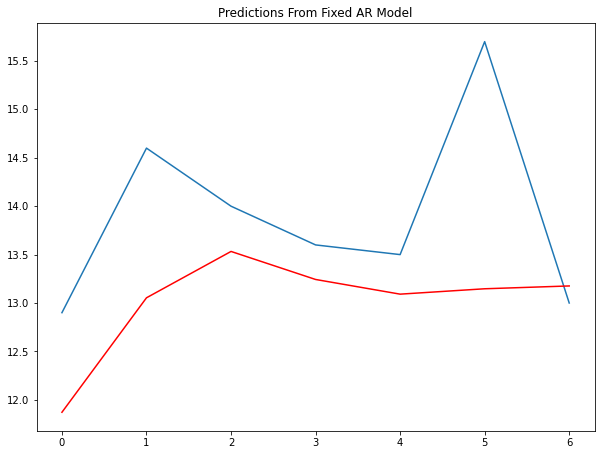

In [43]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Predictions From Fixed AR Model')
plt.show()

#### Rolling forecasts Autoregression model in Python 

The statsmodels API does not make it easy to update the model as new observations become available.

One way would be to re-train the AutoReg model each day as new observations become available, and that may be a valid approach, if not computationally expensive.

An alternative would be to use the learned coefficients and manually make predictions. This requires that the history of 29 prior observations be kept and that the coefficients be retrieved from the model and used in the regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t-1 to t-n. We simply need to use them in the right order on the history of observations, as follows:

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#read the dataset
series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

series

C:\Users\arist\AppData\Local\Temp\ipykernel_21732\2903076366.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [48]:
series.to_frame()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [30]:
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]

print("This is the train dataset", train)
print(f"Train data has {len(train)} observations.")
print("This is the train dataset", test)
print(f"Test data has {len(test)} observations.")

This is the train dataset [17.9 18.8 14.6 ... 13.2 13.9 10. ]
Train data has 3642 observations.
This is the train dataset [12.9 14.6 14.  13.6 13.5 15.7 13. ]
Test data has 7 observations.


In [31]:
# train autoregression
window = 29
model = AutoReg(train, lags=window)
model_fit = model.fit()

coef = model_fit.params

coef

#coefficients start of with the intercept term followed by the coefficients for lagged variables (from t-1 to t-n)

array([ 5.57543506e-01,  5.88595221e-01, -9.08257090e-02,  4.82615092e-02,
        4.00650265e-02,  3.93020055e-02,  2.59463738e-02,  4.46675960e-02,
        1.27681498e-02,  3.74362239e-02, -8.11700276e-04,  4.79081949e-03,
        1.84731397e-02,  2.68908418e-02,  5.75906178e-04,  2.48096415e-02,
        7.40316579e-03,  9.91622149e-03,  3.41599123e-02, -9.11961877e-03,
        2.42127561e-02,  1.87870751e-02,  1.21841870e-02, -1.85534575e-02,
       -1.77162867e-03,  1.67319894e-02,  1.97615668e-02,  9.83245087e-03,
        6.22710723e-03, -1.37732255e-03])

In [32]:
history

[12.9,
 8.8,
 14.7,
 14.7,
 12.7,
 13.3,
 13.2,
 16.2,
 17.3,
 20.5,
 20.2,
 19.4,
 15.5,
 14.1,
 11.0,
 11.1,
 14.0,
 11.4,
 12.5,
 13.4,
 13.6,
 13.9,
 17.2,
 14.7,
 15.4,
 13.1,
 13.2,
 13.9,
 10.0,
 12.9,
 14.6,
 14.0,
 13.6,
 13.5,
 15.7,
 13.0]

In [33]:
train[3613:]

array([12.9,  8.8, 14.7, 14.7, 12.7, 13.3, 13.2, 16.2, 17.3, 20.5, 20.2,
       19.4, 15.5, 14.1, 11. , 11.1, 14. , 11.4, 12.5, 13.4, 13.6, 13.9,
       17.2, 14.7, 15.4, 13.1, 13.2, 13.9, 10. ])

In [13]:
#the last window observation from train data
#index 3613 until the end
history = train[len(train)-window:]

#make array into a list so that we can iterate through it easily
history = list(history)

#create a list for predictions
predictions = list()

#run a loop for predicting the next 7 days (which is basically the length of test)
for t in range(len(test)):
    
    length = len(history) #length is 29
    
    #this is the lagged variables as input (basically what your history variable is)
    #in the next iteration, it has the
    #same length but has updated values since appended with new ones
    lag = [history[i] for i in range(length-window,length)] #this is basically your 'history' variable
    
    #initialize starting value of predicton with the intercept (first element in the coef list)
    yhat = coef[0]
    
    #run your prediction across the lagged variables and coefficients
    for d in range(window):
        
        #basically taking the sum of all lagged variables (input) and respective coefficient plus the intercept
        #multiplied by the lag at the current index to get the prediction
        yhat += coef[d+1] * lag[window-d-1]
#         print('current value of prediction: ', yhat)
       
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
#     print(len(history), len(lag))
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000


In [14]:
#evaluate performance using RMSE - root mean squared error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#what does this RMSE score tell us? - We want it to be as close to 0. The lower the RMSE the better

Test RMSE: 1.204


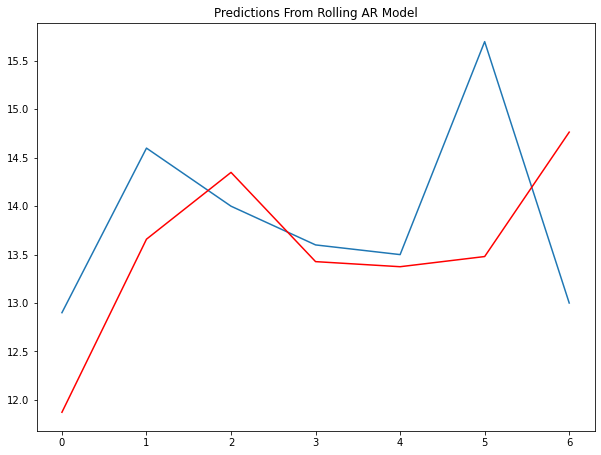

In [87]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Predictions From Rolling AR Model')
plt.show()

## Auto Regressive Moving Average Model (ARMA) 

The ARMA model, or the Autoregressive Moving Average model, is used to describe weakly stationary stochastic time series in terms of two polynomials. The first of these polynomials is for **autoregression**, the second for the **moving average**.

Often this model is referred to as the ARMA(p,q) model; where:

- **p** is the order of the autoregressive polynomial,
- **q** is the order of the moving average polynomial.

The ARMA model can explain the relationshp of time series with both _random noise_ **(moving average)** and _itself at a previous step_ **(autoregression)** 

**What is the difference between ARMA and ARIMA?**

The two models share many similarities. In fact, the AR and MA components are identical, combining a general autoregressive model AR(p) and general moving average model MA(q). AR(p) makes predictions using previous values of the dependent variable. MA(q) makes predictions using the series mean and previous errors.

What sets ARMA and ARIMA apart is **differencing**. An ARMA model is a stationary model; If your model isn’t stationary, then you can achieve stationarity by taking a series of differences. The “I” in the ARIMA model stands for integrated; It is a measure of how many non-seasonal differences are needed to achieve stationarity. If no differencing is involved in the model, then it becomes simply an ARMA.

Reference: Petris G. (2009). The ARMA Model. Retrieved from: https://statisticshowto.com/arma-model/

The formula of the autoregressve moving average model is presented as follows: 

<img src='arma.jpeg' width=500 length=500>

Where:

>φ = the autoregressive model’s parameters,<br>
θ = the moving average model’s parameters.<br>
c = a constant,<br>
Σ = summation notation, <br>
ε = error terms (white noise).

### Simulate ARMA process (1,1) (AR - 1 and MA - 1)

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [89]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [90]:
#Simulate using these arrays
ar1 = np.array([1, 0.33])
ma1 = np.array([1, 0.9])

In [91]:
ARMA_1 = ArmaProcess(ar1, ma1).generate_sample(nsample=1000)

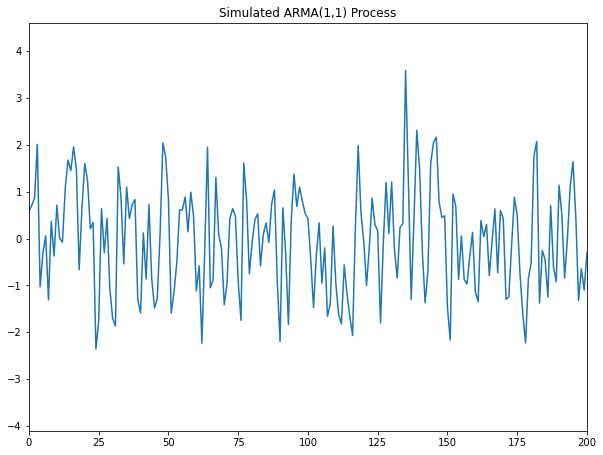

In [92]:
plt.plot(ARMA_1)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

### Plot the ARMA ACF plot 

Since we already know the order of our ARMA model, let us see if we can detect it using the ACF function (correlogram) 

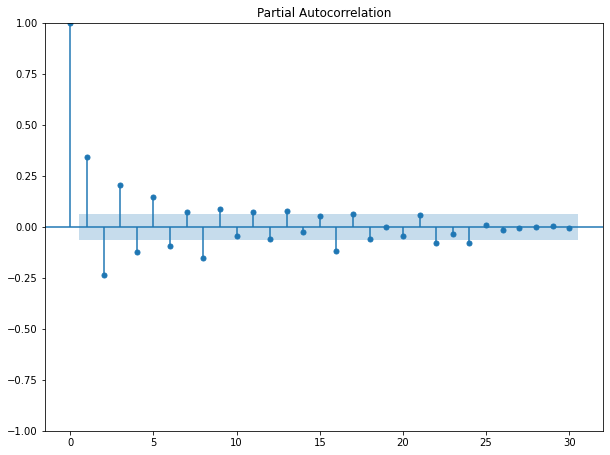

In [93]:
plot_pacf(ARMA_1);

What do you notice?

- oscillation 
- not constant increase/decrease  of cofficeint lags
- not helpful in estimating the order (no information that can be extracted) 
- Suggests that the we try using PACF

### Plot the ARMA PACF plot 

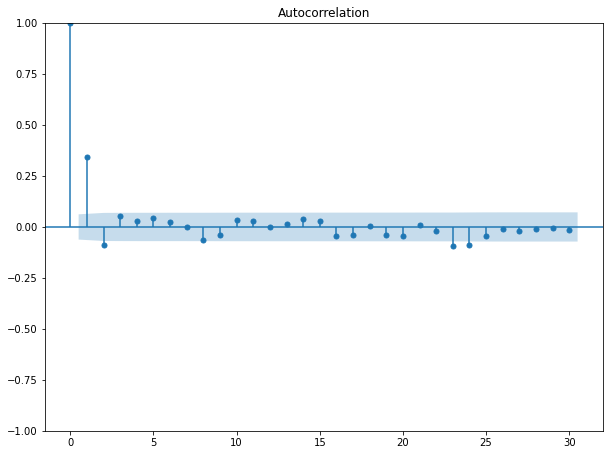

In [94]:
plot_acf(ARMA_1);

Even in the PACF plot, it suggest that the order is at lag 2 when in fact we know that it is only 1. 

> In conclusion, it is difficult to simulate an ARMA process because the correlograms for both ACF and PACF do not give the order for modeling our time series data. 

## A Mini-Project using AR to model real-life data

### Using Yuke-walker Approach

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [90]:
plt.rcParams['figure.figsize'] = (10, 7.5)

In [86]:
#load the dataset
data = pd.read_csv('jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


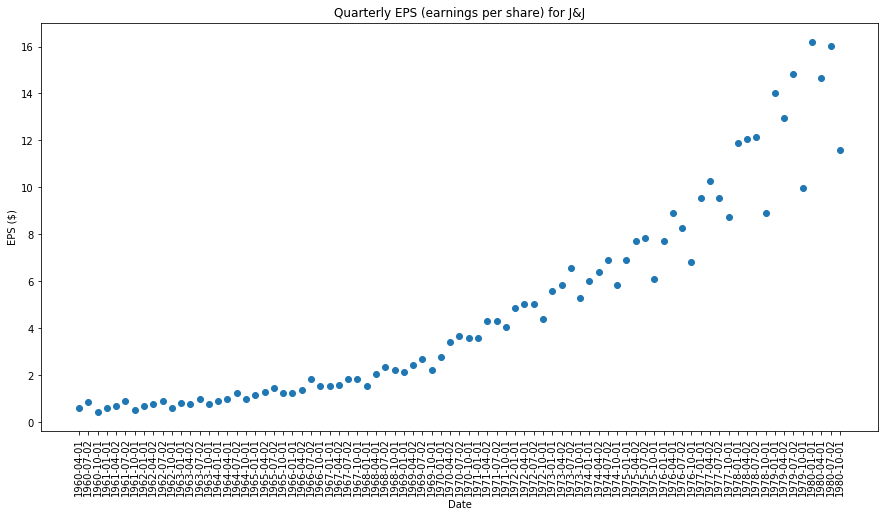

In [107]:
#Visualize the data
plt.figure(figsize=[15, 7.5])
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS (earnings per share) for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

What can you notice?

- Evident trend
- Evident cycles
- Can we say that it is non-stationary?



#### Plotting the ACF Function

Let us double check using the ACF function:

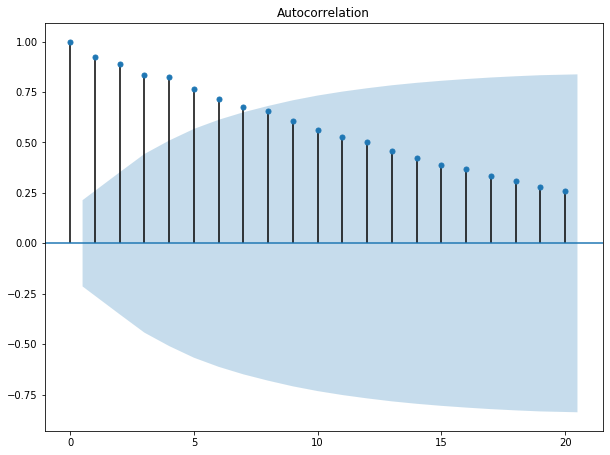

In [92]:
plot_acf(data['data']);

> Therefore, it is indeed **non-stationary**. When we use an Auto-regressive model, we should make sure that it is stationary. 

#### Implement Differencing (Log differencing) 

In [95]:
data

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


In [96]:
#take the log of the 'data column'

data['log_data'] = np.log(data['data'])

data

,date,data,log_data
0,1960-01-01,0.71,-0.342490
1,1960-04-01,0.63,-0.462035
2,1960-07-02,0.85,-0.162519
3,1960-10-01,0.44,-0.820981
4,1961-01-01,0.61,-0.494296
...,...,...,...
79,1979-10-01,9.99,2.301585
80,1980-01-01,16.20,2.785011
81,1980-04-01,14.67,2.685805
82,1980-07-02,16.02,2.773838


In [98]:
#take the log difference between 'data' and 'log_data'

data['log_diff'] = data['log_data'].diff()

data

,date,data,log_data,log_diff
0,1960-01-01,0.71,-0.342490,NaN
1,1960-04-01,0.63,-0.462035,-0.119545
2,1960-07-02,0.85,-0.162519,0.299517
3,1960-10-01,0.44,-0.820981,-0.658462
4,1961-01-01,0.61,-0.494296,0.326684
...,...,...,...,...
79,1979-10-01,9.99,2.301585,-0.396415
80,1980-01-01,16.20,2.785011,0.483427
81,1980-04-01,14.67,2.685805,-0.099207
82,1980-07-02,16.02,2.773838,0.088033


In [99]:
#drop the first row because we cannot model if there is a NaN value
data = data.drop(data.index[0])

data

,date,data,log_data,log_diff
1,1960-04-01,0.63,-0.462035,-0.119545
2,1960-07-02,0.85,-0.162519,0.299517
3,1960-10-01,0.44,-0.820981,-0.658462
4,1961-01-01,0.61,-0.494296,0.326684
5,1961-04-02,0.69,-0.371064,0.123233
...,...,...,...,...
79,1979-10-01,9.99,2.301585,-0.396415
80,1980-01-01,16.20,2.785011,0.483427
81,1980-04-01,14.67,2.685805,-0.099207
82,1980-07-02,16.02,2.773838,0.088033


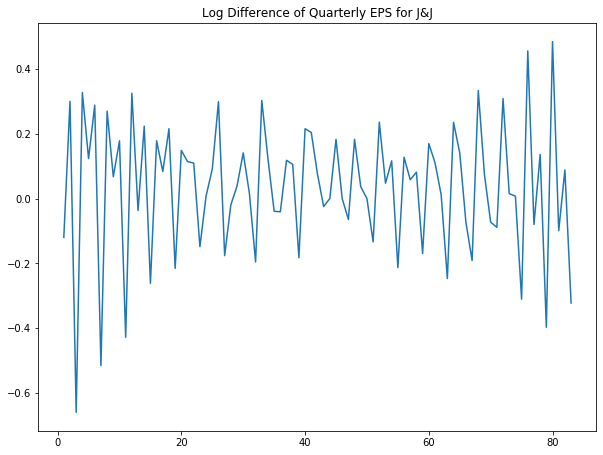

In [101]:
#visualize the log_diff column
plt.plot(data['log_diff'])
plt.title('Log Difference of Quarterly EPS for J&J')
plt.show()

#### Using Ad-fuller to test stationarity

If the **p_value** is less than 0.05 we reject that null hypothesis that the data is non-stationary and accept the alternative hypothesis that indeed the data is stationary. 

In [19]:
#checks whether our data is 
ad_fuller_result = adfuller(data['log_diff'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811827
p-value: 0.0004149731404440817


> Given that the p_value is less than 0.05, the we say that the series is now stationary and we can proceed to modeling.

#### Plotting the ACF and PACF to check for the order

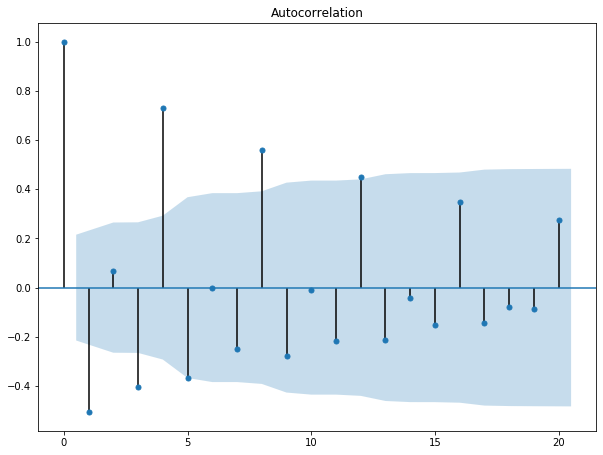

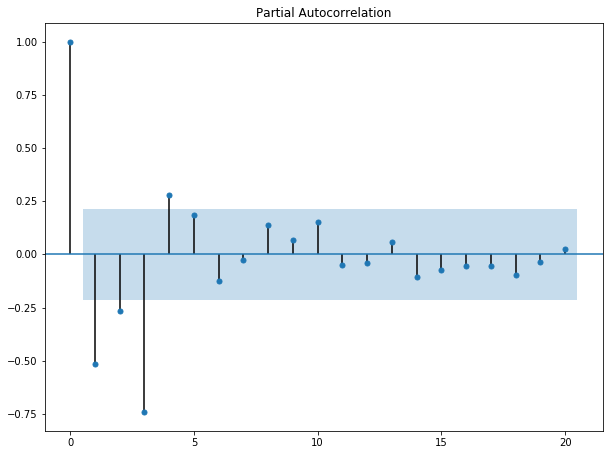

In [20]:
plot_acf(data['data']);
plot_pacf(data['data']);

>  What do you notice?
- oscillation 
- not constant increase/decrease  of cofficeint lags
- not helpful in estimating the order (no information that can be extracted) 
- Suggests that the we try using PACF

> The PACF suggests that we use **lag 4** in building our AR model. 

In [21]:
# Try AR(4)

rho, sigma = yule_walker(data['data'], 4)

print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


This is the model created through yule walker:$ y_t = 0.64y_{t-1} + 0.54y_{t-2} + 0.51y_{t-3} - 0.28y_{t-4} $

### Using the AutoReg Modeling Approach 

Use the log differenced data so that we are assured that it is already stationary. 

In [102]:
# load dataset
series = data['log_diff']

series

1    -0.119545
2     0.299517
3    -0.658462
4     0.326684
5     0.123233
        ...   
79   -0.396415
80    0.483427
81   -0.099207
82    0.088033
83   -0.321971
Name: log_diff, Length: 83, dtype: float64

In [103]:
# split dataset into train and test (make last 4 observations as test)
X = series.values
train, test = X[1:len(X)-4], X[len(X)-4:]


# train autoregression using 15 lags
model = AutoReg(train, lags=15)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 0.11380095 -0.73489997 -0.44955772 -0.53007157  0.18349527  0.04617237
 -0.18227054  0.16021983  0.25798764  0.01679979  0.00687829 -0.24893035
 -0.13374869 -0.01533287 -0.05825842 -0.01288534]


In [104]:
# make predictions for the next 4 quarters after train data
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=0.476800, expected=0.483427
predicted=-0.042716, expected=-0.099207
predicted=0.047750, expected=0.088033
predicted=-0.285857, expected=-0.321971


In [105]:
#evaluate results of model predictions using RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.039


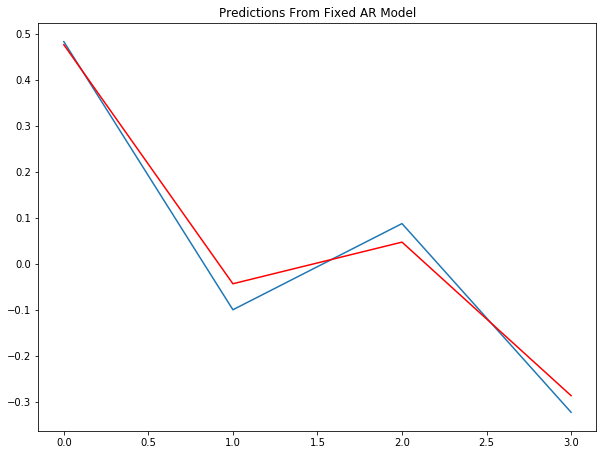

In [108]:
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('Predictions From Fixed AR Model')
plt.show()

## Assignment: 

In another Jupyter Notebook, simulate the following equations:
    
1. Use MA to simulate this equation: $ y_t = 0.5Z_{t-1} + 0.4Z_{t-2} $
2. Use AR to simulate this equation: $ y_t = 0.33y_{t-1} + 0.5y_{t-2} + 0.07y_{t-3} $
2. Use ARMA to simulate an ARMA (2,2) process.
3. Using the AR model, implement the rolling forecasting method in the `jj.csv` dataset. Predict the next 4 quarters of earnings per share data (equivalent to 1 year). Retain the number of lags used in creating the AutoReg() method. 